# TAREA ACADÉMICA

Descripción de Variables del Dataset

| Atributo             | Tipo         | Unidades / Valores                          | Descripción                                                                     |
| -------------------- | ------------ | ------------------------------------------- | ------------------------------------------------------------------------------- |
| Diabetes_binary      | Categórico   | 0 = no diabetes; 1 = prediabetes o diabetes | Variable objetivo que indica si la persona presenta prediabetes o diabetes.     |
| HighBP               | Categórico   | 0 = no; 1 = sí                              | Indica si la persona presenta presión arterial alta.                            |
| HighChol             | Categórico   | 0 = no; 1 = sí                              | Indica si la persona presenta colesterol alto.                                  |
| CholCheck            | Categórico   | 0 = no; 1 = sí                              | Indica si la persona se realizó un chequeo de colesterol en los últimos 5 años. |
| BMI                  | Cuantitativo | Índice (entero)                             | Índice de masa corporal.                                                        |
| Smoker               | Categórico   | 0 = no; 1 = sí                              | Indica si la persona ha fumado al menos 100 cigarrillos en su vida.             |
| Stroke               | Categórico   | 0 = no; 1 = sí                              | Indica si la persona ha sufrido un derrame cerebral.                            |
| HeartDiseaseorAttack | Categórico   | 0 = no; 1 = sí                              | Indica diagnóstico previo de enfermedad coronaria o ataque cardíaco.            |
| PhysActivity         | Categórico   | 0 = no; 1 = sí                              | Indica si realizó actividad física en los últimos 30 días (no incluye trabajo). |
| Fruits               | Categórico   | 0 = no; 1 = sí                              | Indica si consume frutas una o más veces al día.                                |
| Veggies              | Categórico   | 0 = no; 1 = sí                              | Indica si consume vegetales una o más veces al día.                             |
| HvyAlcoholConsump    | Categórico   | 0 = no; 1 = sí                              | Indica si la persona es consumidora elevada de alcohol.                         |
| AnyHealthcare        | Categórico   | 0 = no; 1 = sí                              | Indica si cuenta con algún tipo de cobertura de salud.                          |
| NoDocbcCost          | Categórico   | 0 = no; 1 = sí                              | Indica si la persona necesitó atención médica pero no pudo costearla.           |
| GenHlth              | Cuantitativo | Escala 1–5                                  | Percepción general de salud: 1 = excelente, 5 = pobre.                          |
| MentHlth             | Cuantitativo | Días (1–30)                                 | Días en los que su salud mental no fue buena en los últimos 30 días.            |
| PhysHlth             | Cuantitativo | Días (1–30)                                 | Días en los que su salud física no fue buena en los últimos 30 días.            |
| DiffWalk             | Categórico   | 0 = no; 1 = sí                              | Indica si presenta dificultad para caminar o subir escaleras.                   |
| Sex                  | Categórico   | 0 = mujer; 1 = hombre                       | Sexo del paciente.                                                              |
| Age                  | Cuantitativo | Categoría (1–13)                            | Grupos de edad: 1 = 18–24, …, 13 = 80 o más.                                    |
| Education            | Cuantitativo | Escala 1–6                                  | Nivel educativo: 1 = sin estudios, …, 6 = educación universitaria completa.     |
| Income               | Cuantitativo | Escala 1–8                                  | Nivel de ingresos: 1 = < $10,000; 8 = ≥ $75,000.                                |


Importamos dependencias

In [ ]:
# Cargar libreriras y modulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest   # para seleccionar atributos de forma univariada (filtros)
from sklearn.feature_selection import chi2   # estadististica para evaluar la importancia de atributos en relacion al target
from sklearn.feature_selection import RFE    # metodo recursive featute elimination
from sklearn.decomposition import PCA        # para transformacion PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # para modelos discriminantes lineales
from sklearn.naive_bayes import GaussianNB   # para modelos Naive Bayes
from sklearn.tree import DecisionTreeClassifier     # para usar modelos de tipo arboles de decision
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split  # para partir los datos en conjuntos de entrenamiento y validacion
from sklearn.model_selection import KFold  # para partir la data en k-folds
from sklearn.model_selection import cross_val_score   # para evaluar algoritmos en cross validacion

from sklearn.metrics import accuracy_score, balanced_accuracy_score   # para manejar metricas de desempeño
from sklearn.metrics import classification_report  # para hacer reportes de resultados de clasificacion
from sklearn.metrics import confusion_matrix  # para manejar matrices de confusion
from sklearn.metrics import jaccard_score  # indice jacard


Usaremos un Dataset de diabetes

In [ ]:
#Cargamos dataset
#filename = "diabetes_012.csv"
filename = "diabetes_binary_5050.csv"
dataset = pd.read_csv(filename)

#Mostramos cabeza
dataset.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
dataset.shape

(70692, 22)

In [ ]:
dataset['Diabetes_binary'].value_counts()

,count
Diabetes_binary,
0.0,35346
1.0,35346


In [ ]:
dataset.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

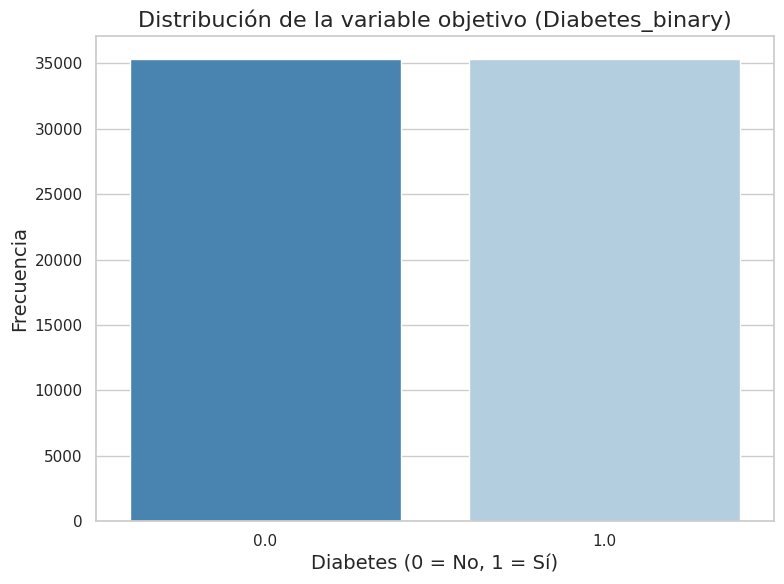

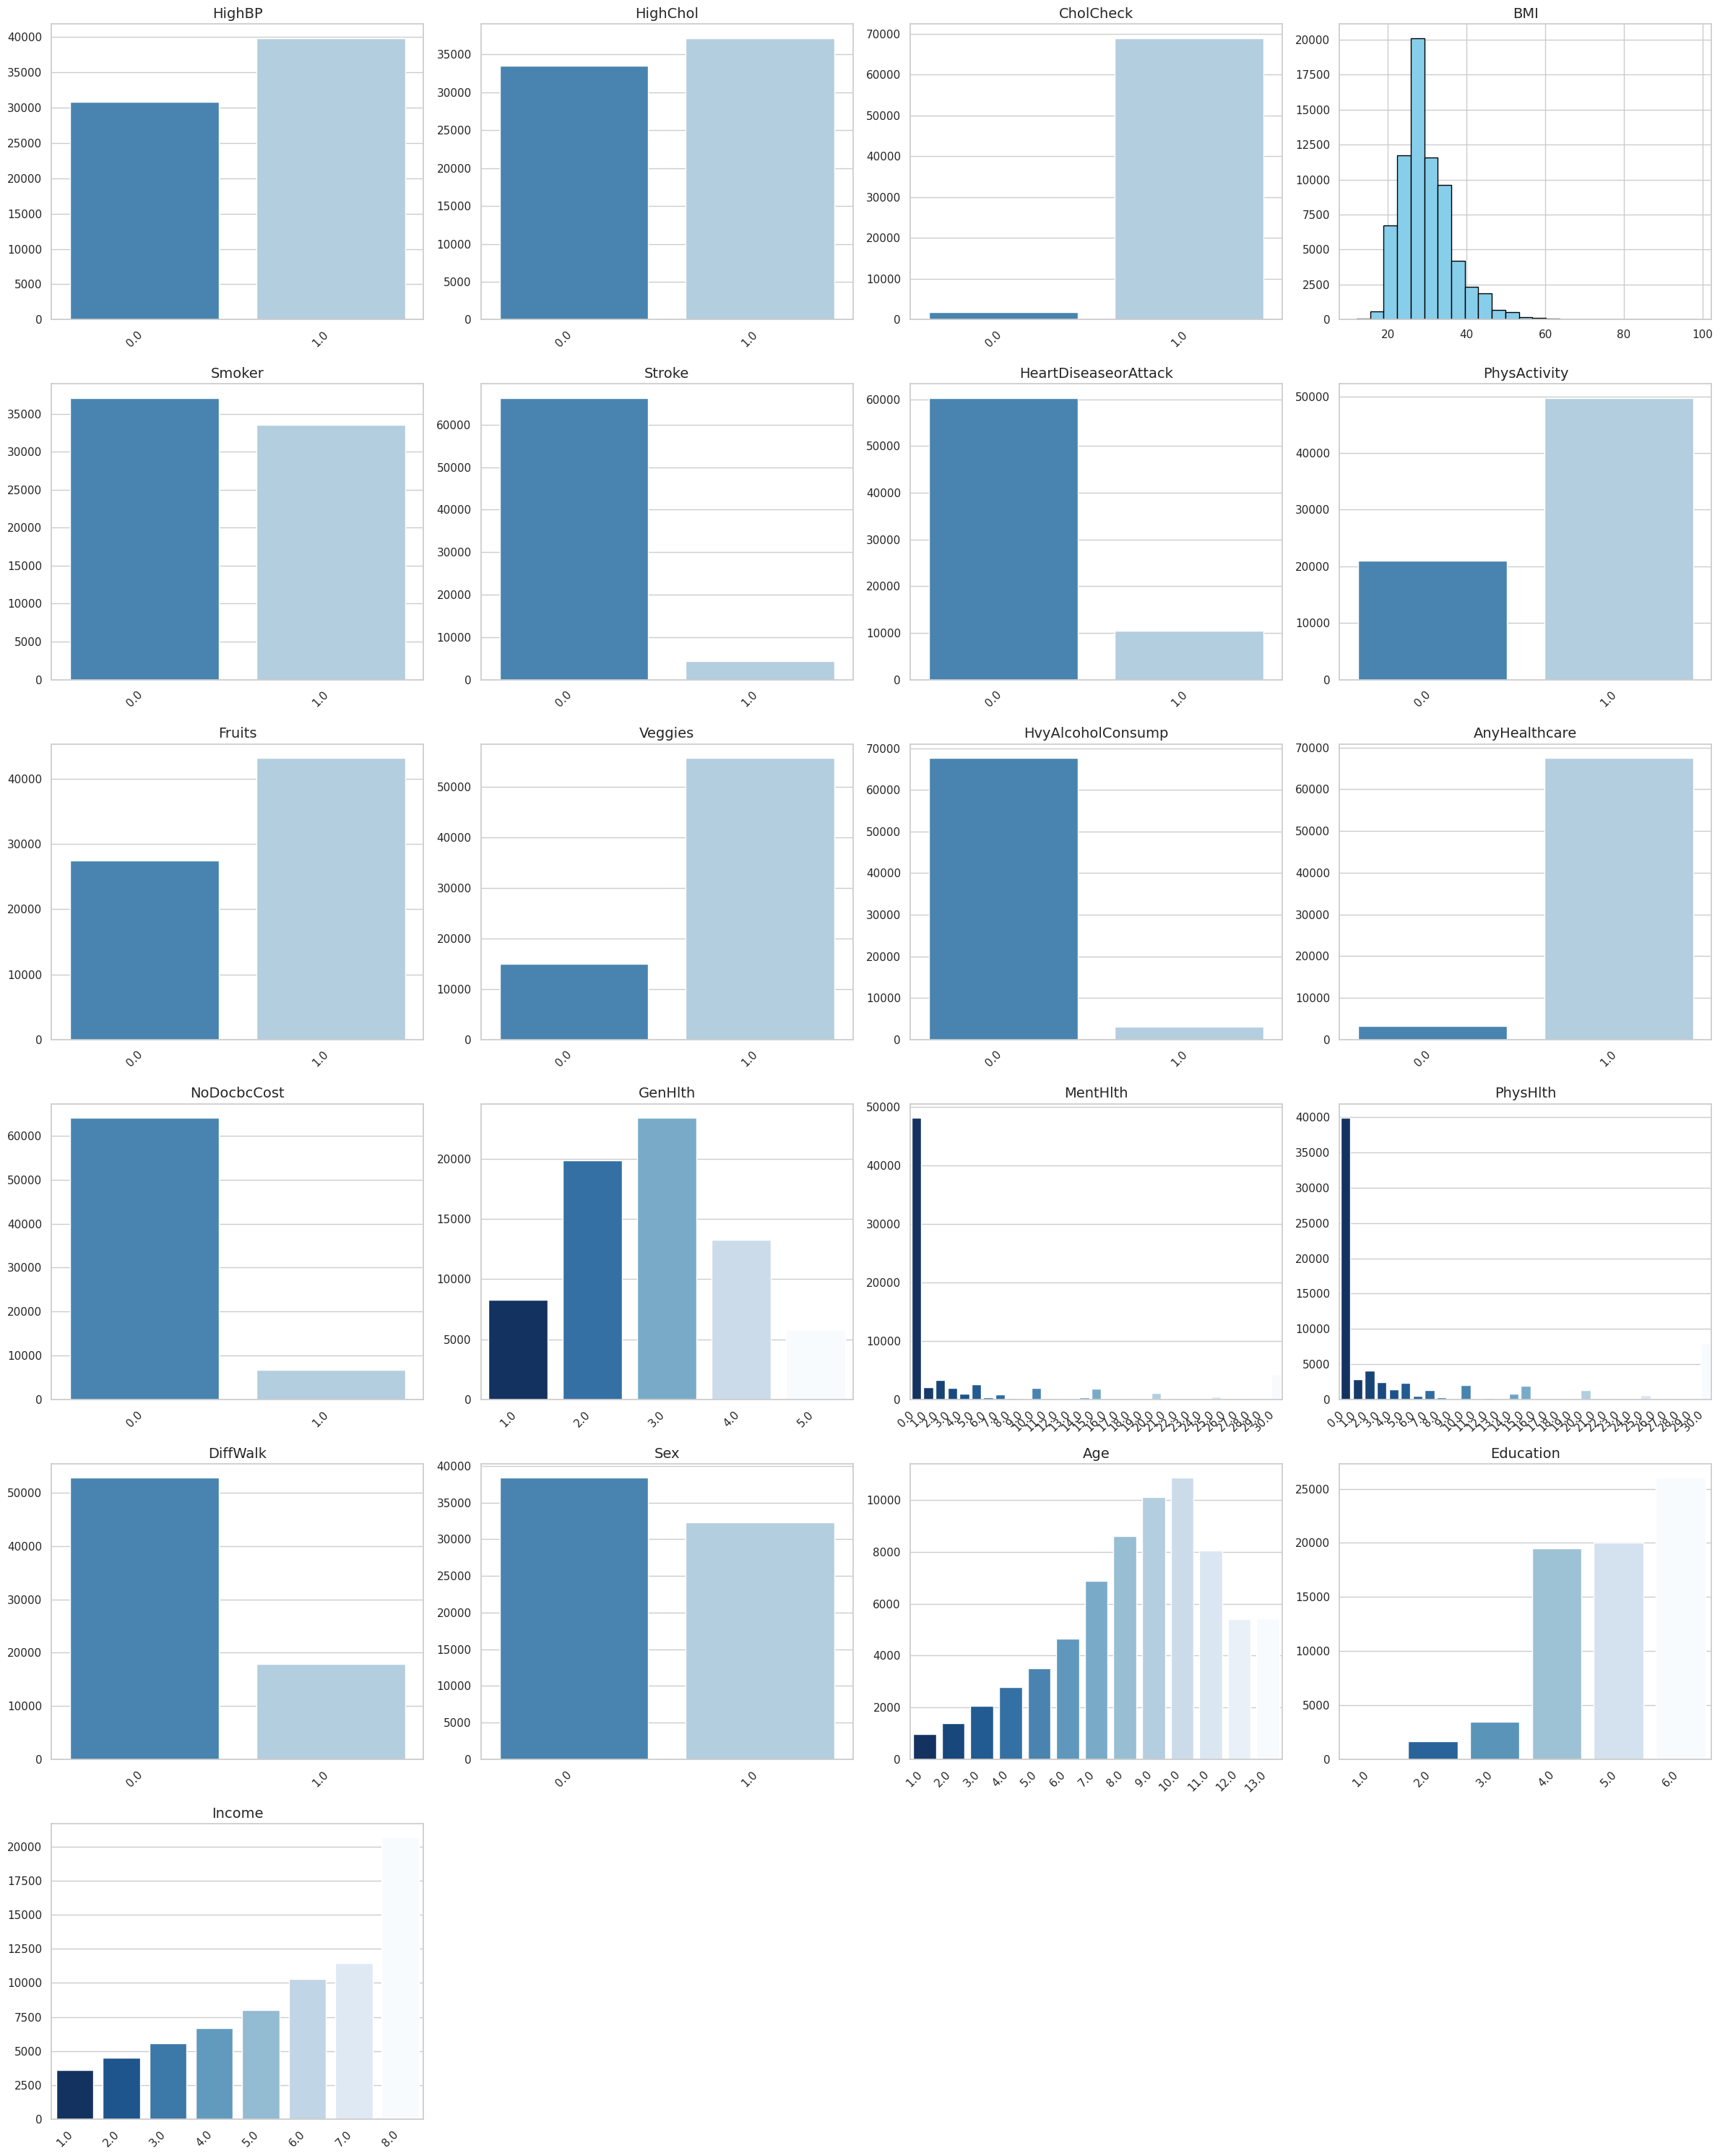

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo general grande y limpio
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})

# ====================================================
# 1. Distribución de la variable objetivo (grande)
# ====================================================
plt.figure(figsize=(8,6))
sns.countplot(x='Diabetes_binary', data=dataset, hue='Diabetes_binary', legend=False, palette="Blues_r")
plt.title("Distribución de la variable objetivo (Diabetes_binary)", fontsize=16)
plt.xlabel("Diabetes (0 = No, 1 = Sí)", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.tight_layout()
plt.show()

# ====================================================
# 2. Distribuciones de características
# ====================================================

feature_cols = dataset.columns[1:]
n_features = len(feature_cols)

n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 6, n_rows * 5))

for i, col in enumerate(feature_cols, 1):
    plt.subplot(n_rows, n_cols, i)

    if col == "BMI":
        plt.hist(dataset[col], bins=25, color="skyblue", edgecolor="black")
    else:
        sns.countplot(x=col, data=dataset, hue=col, legend=False, palette="Blues_r")
        plt.xticks(rotation=45, ha='right')

    plt.title(col, fontsize=14)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()


###Separación de data en Train y Test

In [ ]:
#Separamos atributos y target
#Convertimos el dataset a un arreglo numpy
array = dataset.values

#Atributos: TODAS las columnas excepto la primera (columna 0)
X = array[:, 1:]    # columnas 1 a 22

#Target: la columna 0 (Diabetes_012)
y = array[:, 0]     # columna 0
#Dividomos train-test
valid_fraction = 0.20
seed = 7

X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=valid_fraction, random_state=seed)
print(f"Datos de Training: {len(y_train)} ejemplos. Datos de Validation: {len(y_valid)} ejemplos")

#Muestra la distribucion de las clases
#print(dataset.groupby('Diabetes_012').size())
print(dataset.groupby('Diabetes_binary').size())

#La mayoria de datos son de tipo 0 (Sin diabetes)

Datos de Training: 56553 ejemplos. Datos de Validation: 14139 ejemplos
Diabetes_binary
0.0    35346
1.0    35346
dtype: int64


###Análisis de correlación entre variables

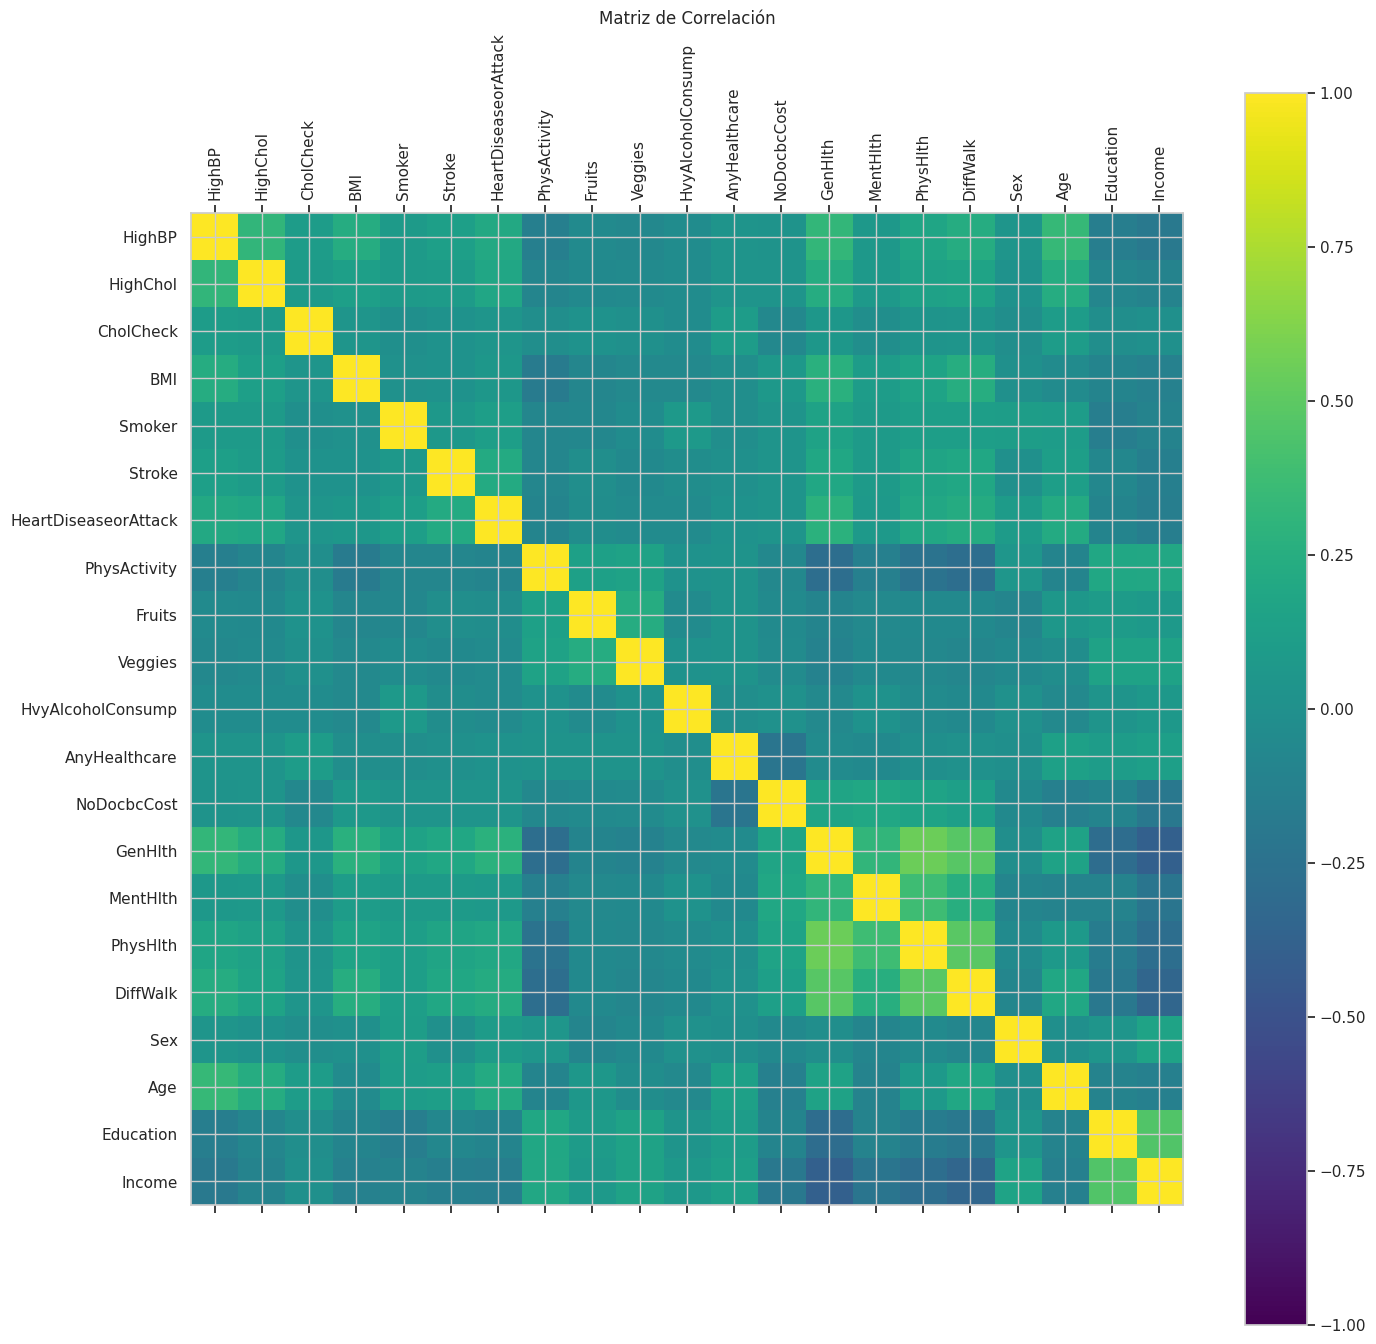

In [ ]:
#Obtener los nombres de las columnas numéricas (todas las columnas excepto la target)
numeric_columns = dataset.columns[1:]

#Convertir X a DataFrame usando los nombres originales
X_df = pd.DataFrame(X, columns=numeric_columns)

# 3. Calcular matriz de correlación
correlations = X_df.corr()

# 4. Graficar matriz de correlación
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111)

cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap='viridis')
fig.colorbar(cax)

ticks = np.arange(len(numeric_columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(numeric_columns, rotation=90)
ax.set_yticklabels(numeric_columns)

plt.title("Matriz de Correlación")
plt.show()


Identificamos las variables con mayor correlación entre ellas

In [ ]:
# Tomamos la matriz existente
corr_matrix = correlations.abs()

# Convertimos a formato de pares
corr_pairs = corr_matrix.unstack()

# Eliminamos correlaciones de una variable consigo misma
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Eliminamos duplicados (X,Y vs Y,X)
corr_pairs = corr_pairs.drop_duplicates()

# Filtramos correlaciones fuertes
umbral = 0.5
corr_altas = corr_pairs[corr_pairs > umbral].sort_values(ascending=False)

print("Pares de variables con correlación alta:")
print(corr_altas)


Pares de variables con correlación alta:
GenHlth  PhysHlth    0.552757
dtype: float64


Verificamos que la correlación más alta mayor a 0.5 es entre las variables GenHlth y PhysHlth con 0.552757 que no es una correlación muy alta por lo que todas las variables se mantienen.

###Evaluación de algoritmos
Se evaluarán diferentes algoritmos:
- Decision Tree (Sin limite de profundidad)
- Decision Tree (Con limite de profundidad)
- Random Forest (300 árboles de decisión, sin límite de profundidad)
- Random Forest (300 árboles de decisión, con límite de profundidad)

In [ ]:
# Algoritmos a evaluar
algos = []
algos.append(('CART_none', DecisionTreeClassifier(max_depth=None ))) # genera DT sin restriccion de profundidad
algos.append(('CART_20', DecisionTreeClassifier(max_depth=20 ))) # genera DT sin restriccion de profundidad

# Random Forest
algos.append(('RF_300L', RandomForestClassifier(n_estimators=300, random_state=seed))) #sin límite de profundidad
algos.append(('RF_300', RandomForestClassifier(n_estimators=300, max_depth=20, random_state=seed))) #límite de profundidad máxima de 20

Evaluaremos cada algoritmo con los datos de training en estrategia de Crossvalidación con 10-folds. Además, usaremos el mismo particionamiento de folds en cada algoritmo que evaluaremos para asegurara una comparación justa.

In [ ]:
# Evaluamos cada algoritmo de ML en estrategia de 10-fold-CV
results = []
names = []

# Genera el particionamiento de 10 folds que seran usados en cada evaluacion
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle= True)  # especifica el particionador de datos a 10-folds CV

# Evalua cada algoritmo de ML
for algoname, algo in algos:
    cv_results = cross_val_score(algo, X_train, y_train, cv=kfold, scoring='balanced_accuracy')
    results.append(cv_results)
    names.append(algoname)
    print("{}: {} ({})".format(algoname, cv_results.mean(), cv_results.std()))

CART_none: 0.6522265079449125 (0.006269917064816616)
CART_20: 0.6643876758741356 (0.006283099184058019)
RF_300L: 0.7372539123348327 (0.006165879978655793)
RF_300: 0.7432859331663868 (0.005404612232996533)


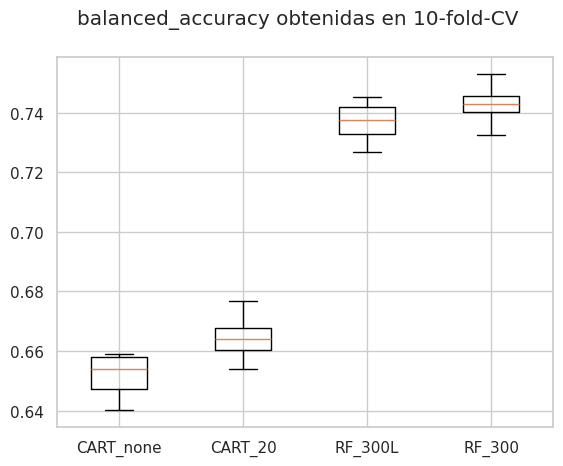

In [ ]:
# Muestra graficamente los resultados de balanced_accuracy en crossvalidacion de los Algoritmos evaluados
fig = plt.figure()
fig.suptitle('balanced_accuracy obtenidas en 10-fold-CV')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Entrenamos el modelo con el algoritmo seleccionado y lo probamos en datos de validación

Ahora entrenaremos un modelo con el algoritmo con mejores resultados (RandomForestClassifier(n_estimators=300, max_depth=20, random_state=seed)) usando todos los datos de entrenamiento y lo evaluamos en la data separada para validación.

In [ ]:
# Reentramos el modelo con Random Forest con 300 árboles de decisión y límite de profundidad de 20,
# con todos los datos de entrenamiento y lo probamos en el conjunto de validación
model = RandomForestClassifier(n_estimators=300, max_depth=20, random_state=seed)
model.fit(X_train, y_train)

# Predecimos la clase del conjunto de validación
y_predicted = model.predict(X_valid)
print("Balanced Accuracy score:", balanced_accuracy_score(y_valid, y_predicted))

# Muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("\nMatriz de Confusión:")
print(confusion_matrix(y_valid, y_predicted))

# Muestra un reporte de la clasificacion en validacion
print("\nReporte de clasificacion en conjunto de validacion: \n")
print(classification_report(y_valid, y_predicted))

Balanced Accuracy score: 0.7487732237972593

Matriz de Confusión:
[[4990 2121]
 [1435 5593]]

Reporte de clasificacion en conjunto de validacion: 

              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      7111
         1.0       0.73      0.80      0.76      7028

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



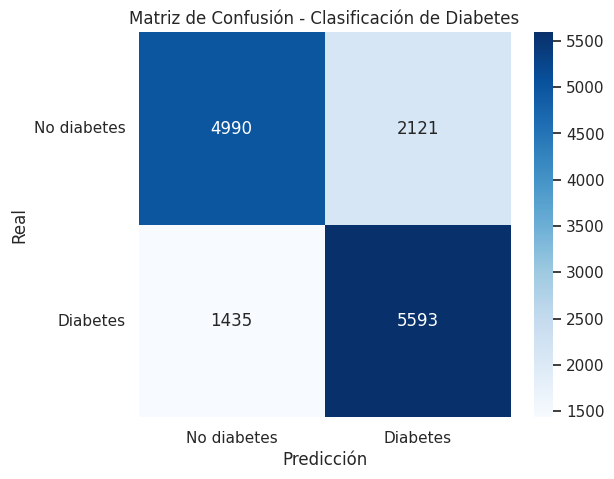

In [ ]:
# Predicciones de clase (DT y RF devuelven directamente 0/1)
y_pred_class = model.predict(X_valid)

# Matriz de confusión
cm = confusion_matrix(y_valid, y_pred_class)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title("Matriz de Confusión - Clasificación de Diabetes")
plt.xlabel("Predicción")
plt.ylabel("Real")

plt.xticks([0.5, 1.5], ["No diabetes", "Diabetes"], rotation=0)
plt.yticks([0.5, 1.5], ["No diabetes", "Diabetes"], rotation=0)

plt.show()

In [ ]:
# Accuracy en entrenamiento
train_pred = model.predict(X_train)
train_bal_acc = balanced_accuracy_score(y_train, train_pred)
print("Balanced Accuracy - Entrenamiento:", train_bal_acc)

# Accuracy en validación final
valid_pred = model.predict(X_valid)
valid_bal_acc = balanced_accuracy_score(y_valid, valid_pred)
print("Balanced Accuracy - Validación:", valid_bal_acc)

Balanced Accuracy - Entrenamiento: 0.9590047012556538
Balanced Accuracy - Validación: 0.7487732237972593


In [ ]:
cv_results = cross_val_score(algo, X_train, y_train, cv=kfold,
                             scoring='balanced_accuracy')
print("CV mean:", cv_results.mean())

###Usando Pipelines

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline

In [ ]:
# Definimos el pool de pipleines de ML (MinMaxScaler + algoritmo de ML) a evaluar
pipelines = []
pipelines.append(('CART', make_pipeline(MinMaxScaler(), DecisionTreeClassifier(max_depth=None))))
pipelines.append(('CART20', make_pipeline(MinMaxScaler(), DecisionTreeClassifier(max_depth=20))))
pipelines.append(('RF_200l', make_pipeline(MinMaxScaler(), RandomForestClassifier(n_estimators=300, random_state=seed))))
pipelines.append(('RF_200', make_pipeline(MinMaxScaler(), RandomForestClassifier(n_estimators=300, max_depth=20, random_state=seed))))

In [ ]:
# Evaluamos cada algoritmo de ML en estrategia de 10-fold-CV
results = []
names = []

# Genera el particionamiento de 10 folds que seran usados en cada evaluacion
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle= True)  # especifica el particionador de datos a 10-folds CV

# Evalua cada algoritmo de ML
for algoname, algo in pipelines:
    cv_results = cross_val_score(algo, X_train, y_train, cv=kfold, scoring='balanced_accuracy')
    results.append(cv_results)
    names.append(algoname)
    print("{}: {} ({})".format(algoname, cv_results.mean(), cv_results.std()))

CART: 0.6501682666241153 (0.0062236356591197604)
CART20: 0.6641424939089843 (0.006773259425042533)
RF_200l: 0.7371660270262629 (0.006162795670953664)
RF_200: 0.7434497897134862 (0.005266429413262028)


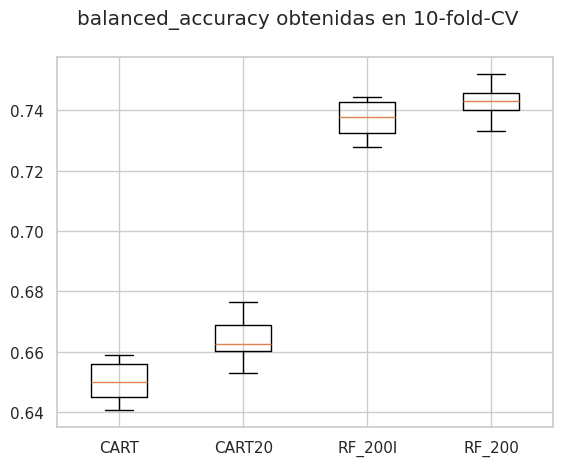

In [ ]:
# Muestra graficamente los resultados de balanced_accuracy en crossvalidacion de los pipelines evaluados
fig = plt.figure()
fig.suptitle('balanced_accuracy obtenidas en 10-fold-CV')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Entrenamos el mejor modelo contoda la data de train

In [ ]:
# Reentrena el pipeline con todos los datos de entrenamiento y lo prueba en el conjunto de validación
model = make_pipeline(MinMaxScaler(), RandomForestClassifier(n_estimators=300, max_depth=20, random_state=seed))
model.fit(X_train, y_train)

# Predice la clase del conjunto de validación
y_predicted = model.predict(X_valid)
print("Balanced Accuracy score:", balanced_accuracy_score(y_valid, y_predicted))

# Muestra la matriz de confusión
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("\nMatriz de Confusión:")
print(confusion_matrix(y_valid, y_predicted))

# Muestra un reporte de la clasificacion en validación
print("\nReporte de clasificacion en conjunto de validacion:\n")
print(classification_report(y_valid, y_predicted))

Balanced Accuracy score: 0.7495582989375643

Matriz de Confusión:
[[4987 2124]
 [1421 5607]]

Reporte de clasificacion en conjunto de validacion:

              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      7111
         1.0       0.73      0.80      0.76      7028

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



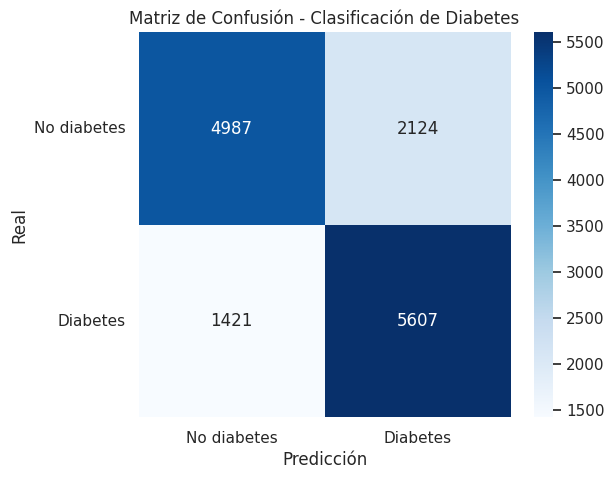

In [ ]:
# Predicciones de clase (DT y RF devuelven directamente 0/1)
y_pred_class = model.predict(X_valid)

# Matriz de confusión
cm = confusion_matrix(y_valid, y_pred_class)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title("Matriz de Confusión - Clasificación de Diabetes")
plt.xlabel("Predicción")
plt.ylabel("Real")

plt.xticks([0.5, 1.5], ["No diabetes", "Diabetes"], rotation=0)
plt.yticks([0.5, 1.5], ["No diabetes", "Diabetes"], rotation=0)

plt.show()

###Revisaremos la importancia de características


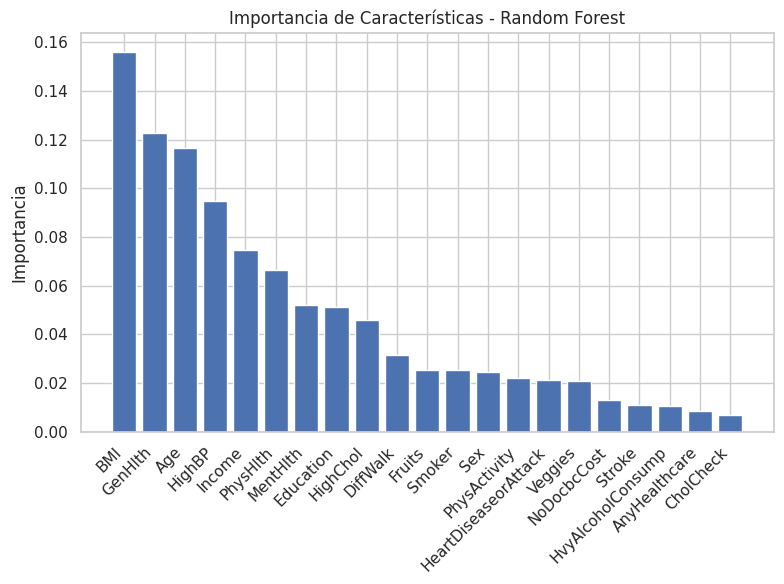

In [ ]:
feature_names = dataset.columns[1:]

rf = model.named_steps["randomforestclassifier"]
importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [feature_names[i] for i in indices],
           rotation=45, ha='right')
plt.title("Importancia de Características - Random Forest")
plt.ylabel("Importancia")
plt.tight_layout()
plt.show()

In [ ]:
# Accuracy en entrenamiento
train_pred = model.predict(X_train)
train_bal_acc = balanced_accuracy_score(y_train, train_pred)
print("Balanced Accuracy - Entrenamiento:", train_bal_acc)

# Accuracy en validación final
valid_pred = model.predict(X_valid)
valid_bal_acc = balanced_accuracy_score(y_valid, valid_pred)
print("Balanced Accuracy - Validación:", valid_bal_acc)

Balanced Accuracy - Entrenamiento: 0.9589515237986332
Balanced Accuracy - Validación: 0.7495582989375643


In [ ]:
cv_results = cross_val_score(algo, X_train, y_train, cv=kfold,
                             scoring='balanced_accuracy')
print("CV mean:", cv_results.mean())

CV mean: 0.7434497897134862
